https://www.kaggle.com/code/ritvikteja/predicting-startup-success#Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

sns.set_style("whitegrid")
sns.set()

In [2]:
# df = pd.read_csv('investments_VC.csv', encoding='cp1252' )
df = pd.read_csv('investments_VC.csv', encoding='utf-8', encoding_errors='replace')


In [3]:
df = df.set_index('name')

In [4]:
df.shape

(49438, 38)

In [5]:
df['status'].value_counts()

status
operating    41829
acquired      3692
closed        2603
Name: count, dtype: int64

In [6]:
df = df.dropna()#isna().sum()

In [7]:
df = df.drop(columns=['permalink',
                      'homepage_url',
                      # 'category_list',
                      # 'state_code',
                      'founded_at',
                      'founded_month', 
                      'founded_quarter',
                      'founded_year', 
                      'first_funding_at', 
                      'last_funding_at',
                     ])

In [9]:
df.columns

Index(['category_list', ' market ', ' funding_total_usd ', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [10]:
df

,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,seed,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
name,,,,,,,,,,,,,,,,,,,,,
#waywire,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,1750000,...,0,0,0,0,0,0,0,0,0,0
004 Technologies,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,0,...,0,0,0,0,0,0,0,0,0,0
1-800-DENTIST,|Health and Wellness|,Health and Wellness,-,operating,USA,CA,Los Angeles,Los Angeles,1,0,...,0,0,0,0,0,0,0,0,0,0
1-800-DOCTORS,|Health and Wellness|,Health and Wellness,"17,50,000",operating,USA,NJ,Newark,Iselin,1,0,...,0,0,0,0,0,0,0,0,0,0
10-20 Media,|E-Commerce|,E-Commerce,"20,50,000",operating,USA,MD,Baltimore,Woodbine,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zynerba Pharmaceuticals,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,Radnor,1,0,...,0,0,0,0,0,0,0,0,0,0
Zynga,|Technology|Facebook Applications|Networking|G...,Technology,"86,65,50,786",operating,USA,CA,SF Bay Area,San Francisco,9,0,...,0,0,15026000,355187000,490000000,0,0,0,0,0
Zyngenia,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",Gaithersburg,1,0,...,0,0,25000000,0,0,0,0,0,0,0


In [11]:
cat_cols = ['category_list',
            ' market ',
            ' funding_total_usd ',
            'status',
            'country_code',
            'state_code',
            'region',
            'city',
           ]
for col in cat_cols:
    df[col] = df[col].astype('category')

In [12]:
df.dtypes

category_list           category
 market                 category
 funding_total_usd      category
status                  category
country_code            category
state_code              category
region                  category
city                    category
funding_rounds             int64
seed                       int64
venture                    int64
equity_crowdfunding        int64
undisclosed                int64
convertible_note           int64
debt_financing             int64
angel                      int64
grant                      int64
private_equity             int64
post_ipo_equity            int64
post_ipo_debt              int64
secondary_market           int64
product_crowdfunding       int64
round_A                    int64
round_B                    int64
round_C                    int64
round_D                    int64
round_E                    int64
round_F                    int64
round_G                    int64
round_H                    int64
dtype: obj

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["status"]),
    df["status"],
    train_size=0.8,
    random_state=0,
)

In [22]:
(df['status'].value_counts()/df.shape[0]).values

array([0.84468864, 0.10082418, 0.05448718])

In [23]:
import lightgbm as lgb

clf_lgb = lgb.LGBMClassifier(max_depth=5, n_estimators=10, random_state=0, class_weight='balanced')
clf_lgb.fit(X_train, y_train)#, eval_metric="logloss")

print(
    "Training set score (mean accuracy): {:.4f}".format(clf_lgb.score(X_train, y_train))
)
print("Test set score (mean accuracy): {:.4f}".format(clf_lgb.score(X_test, y_test)))

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4775
[LightGBM] [Info] Number of data points in the train set: 17472, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [25]:
import shap
shap.initjs()

/home/renku/work/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
# First of all, let's build the explainer
explainer = shap.TreeExplainer(clf_lgb)
shap_values = explainer(X_train)

In [40]:
# Phone model under investigation
company = "mPura"

feature_vector = X_test.loc[[company]]
feature_vector.T

name,mPura
category_list,|Hospitality|
market,Hospitality
funding_total_usd,"2,00,000"
country_code,USA
state_code,CA
region,SF Bay Area
city,Fremont
funding_rounds,1
seed,0
venture,0


<br>

## 2.1. Explain overall impact of features

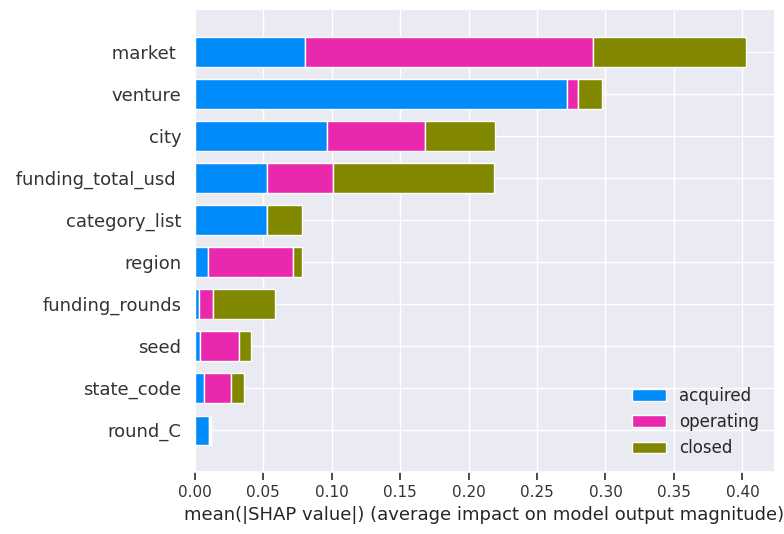

In [61]:
# Show average shap value per class
shap.summary_plot(
    shap_values, X_train, class_names=clf_lgb.classes_, plot_type="bar", max_display=10
)

<br>

## 2.2. Explain individual prediction 

In [83]:
# Remember that shap_values() returns a list with 1 element per class. Here we need to know the index of the prediced class to find the shap values of our prediction
idx_predicted_class = np.argmax(clf_lgb.predict_proba(feature_vector))
idx_predicted_class

np.int64(1)

In [95]:
company_shap_values = explainer(feature_vector)


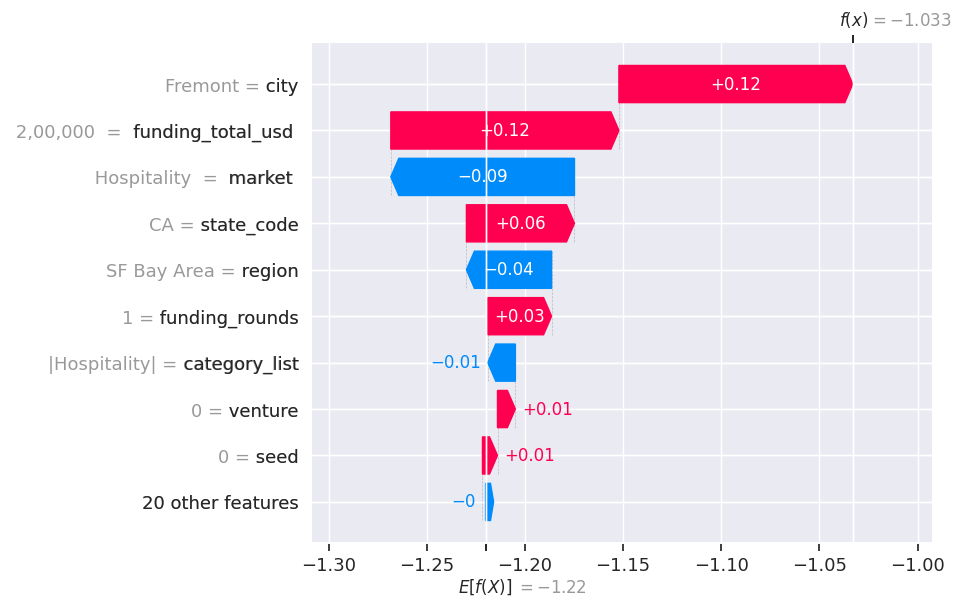

In [97]:
# shap.plots.waterfall(shap_values[0,:,idx_predicted_class])
shap.plots.waterfall(company_shap_values[0,:,idx_predicted_class])

In [51]:
# Compute shap values just for the prediction under investigation (alternatively, retrieve it form the shap values computed above)
company_shap_values = explainer.shap_values(feature_vector)

print(type(company_shap_values), len(company_shap_values))
print(company_shap_values[0].shape)

<class 'numpy.ndarray'> 1
(29, 3)


np.int64(1)

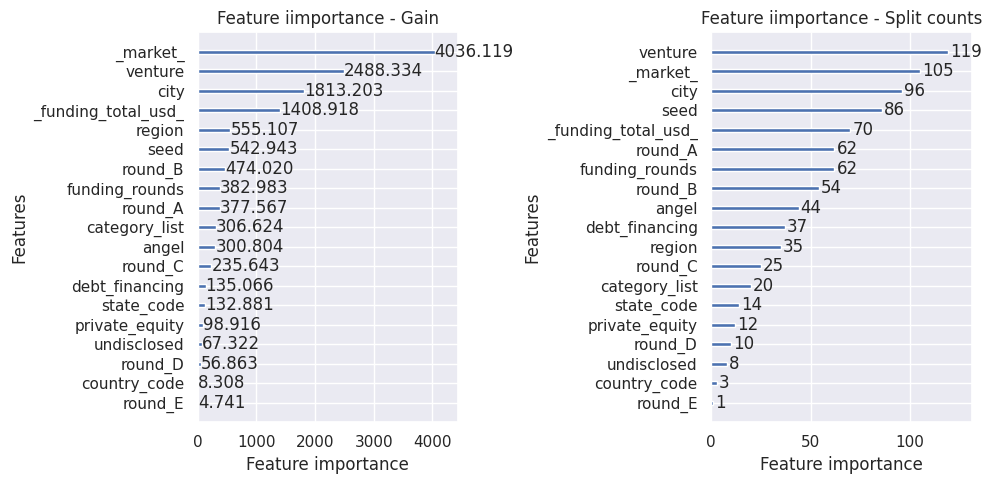

In [15]:
f, a = plt.subplots(1, 2, figsize=(10, 5))
lgb.plot_importance(
    clf_lgb,
    importance_type="gain",
    ax=a[0],
    title="Feature importance - Gain",
)
lgb.plot_importance(
    clf_lgb,
    importance_type="split",
    ax=a[1],
    title="Feature importance - Split counts",
)
plt.tight_layout()